In [7]:
%matplotlib inline 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [8]:
os.getcwd()

'/Users/parksoy/Desktop/GoogleDrive_Soyoung/Udacity_nanoDegree_MachineLearning/capstone/study_prep'

In [9]:
import urllib

def fetch_data(symbol):
    """ Downloads .csv files for <symbols> from Yahoo Finance and saves them in 'data' directory."""
    
    '''url = "http://ichart.finance.yahoo.com/table.csv?s="+symbol+\
    "&amp;d=1&amp;e=1&amp;f=2016&amp;g=d&amp;a=8&amp;b=7&amp;c=2000&amp;ignore=.csv"
    '''
    time_frame = "m" # d -> daily, w -> weekly, m -> monthly.
    url = "http://real-chart.finance.yahoo.com/table.csv?s="+symbol+\
            "&a=11&b=22&c=1998&d=04&e=9&f=2016&g="+time_frame+"+&ignore=.csv"

    urllib.urlretrieve(url, '{}.csv'.format(symbol))
    print "DEBUG: Downloading for "+symbol
    print "DEBUG: URL:"+url


def test_run():
    # Choose stock symbols to read
    symbols = ['SPY'] 
    for symbol in symbols:
       fetch_data(symbol) #Download csv for symbol loading.
    
test_run()

DEBUG: Downloading for SPY
DEBUG: URL:http://real-chart.finance.yahoo.com/table.csv?s=SPY&a=11&b=22&c=1998&d=04&e=9&f=2016&g=m+&ignore=.csv


In [12]:
def func1():
    #Define data range
    start_date='2010-01-22'
    end_date='2010-01-26'
    dates=pd.date_range(start_date,end_date)
    print dates
    
    #Create an empty dataframe
    df1=pd.DataFrame(index=dates)
    print 'empty df1=\n',df1
    
    #Read SPY data into temp dataframe
    dfSPY=pd.read_csv("SPY.csv",index_col="Date",parse_dates=True,
                      usecols=['Date','Adj Close'],na_values=['nan'])
    
    #rename 'Adj Close' to 'SPY' to prevent clash
    dfSPY=dfSPY.rename(columns={'Adj Close':'SPY'})
    
    #Join the two dataframes using DataFrame.join()
    df1=df1.join(dfSPY,how='inner') #This drops na
    
    #df2=df1.join(dfSPY)
    #df2=df2.dropna()
    #print 'df2=\n',df2 
    
    symbols=['GOOG','IBM','GLD']
    for symbol in symbols:
        df_temp=pd.read_csv("{}.csv".format(symbol),index_col="Date",parse_dates=True,
                      usecols=['Date','Adj Close'],na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df1=df1.join(df_temp) #default how='left'
    print 'df1=\n', df1
    print 'df1.ix=\n', df1.ix[0:1]#'2010-01-25':'2010-01-26'
    
func1()

DatetimeIndex(['2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25',
               '2010-01-26'],
              dtype='datetime64[ns]', freq='D')
empty df1=
Empty DataFrame
Columns: []
Index: [2010-01-22 00:00:00, 2010-01-23 00:00:00, 2010-01-24 00:00:00, 2010-01-25 00:00:00, 2010-01-26 00:00:00]


IOError: File GOOG.csv does not exist

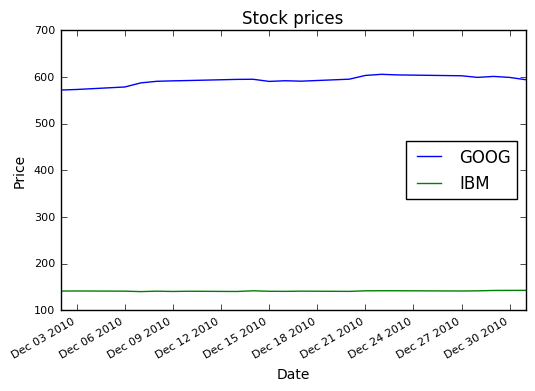

In [5]:
"""Utility functions"""


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp=pd.read_csv(symbol_to_path(symbol),
                            index_col="Date",
                            parse_dates=True,
                            usecols=['Date','Adj Close'],
                            na_values=['nan'])
        
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp, how='inner') #default how='left'
        if symbol=='SPY': #drop dates SPY didnt trade
            df=df.dropna(subset=["SPY"])
    return df

def plot_data(df, title='Stock prices'):
    ax=df.plot(title=title,fontsize=8)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def plot_selected(df,columns,end_index, start_index):
    df_plot=df.ix[end_index:start_index,columns]
    plot_data(df_plot, title='Stock prices')
    

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    #Slice by row range(Dates) using dataframe.ix[] selector
    #print df.ix['2010-12-29':'2010-12-31'] #
    
    #Slice by column(symbols)
    #print df[['GOOG','IBM']]
    
    #Slice by row and column
    #print df.index
    #print df.ix['2010-12-31':'2010-12-30',['GOOG','IBM']]
    
    #plot_data(df)
    plot_selected(df,['GOOG','IBM'],'2010-12-31','2010-12-01')

    
test_run()


In [13]:
"""Slice and plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt


def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    df_plot=df.ix[end_index:start_index,columns]
    df_plot=normarlize_data(df_plot)
    plot_data(df_plot, title='Selected Stock Prices')


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def normarlize_data(df):
    return df/df.ix[0,:]

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(df, ['GOOG','SPY', 'IBM'], '2010-04-01','2010-03-01')

test_run()

IOError: File data/SPY.csv does not exist

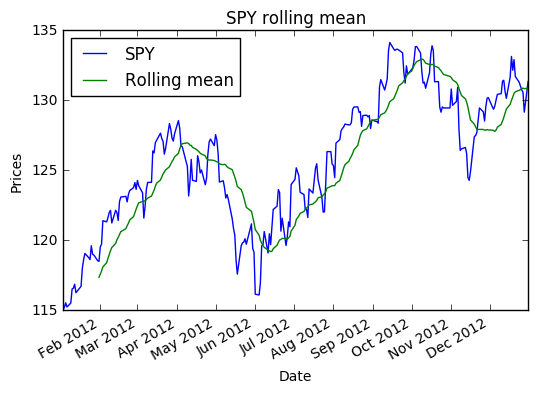

In [16]:
"""Slice and plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt


def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    df_plot=df.ix[end_index:start_index,columns]
    df_plot=normarlize_data(df_plot)
    plot_data(df_plot, title='Selected Stock Prices')


def symbol_to_path(symbol, base_dir=""):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def normarlize_data(df):
    return df/df.ix[0,:]

def test_run():
    # Define a date range
    dates = pd.date_range('2012-01-01', '2012-12-31')

    # Choose stock symbols to read
    symbols = ['SPY']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)
    
    ax=df['SPY'].plot(title='SPY rolling mean', label='SPY')

    rm_SPY=df['SPY'].rolling(window=20).mean()
    rm_SPY.plot(label='Rolling mean', ax=ax)
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Prices")
    ax.legend(loc='upper left')
    plt.show()
    
test_run()


In [14]:
"""Bollinger Bands."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    #old:pd.rolling_mean(values, window=window)
    return values.rolling(window=window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    #old return pd.rolling_std(values, window=window)
    return values.rolling(window=window).std()


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band=rm+2*rstd
    lower_band=rm-2*rstd
    
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax,fontsize=7)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date",fontsize=7)
    ax.set_ylabel("Price",fontsize=7)
    ax.legend(loc='upper left', fontsize=7)
    plt.show()


if __name__ == "__main__":
    test_run()


IOError: File data/SPY.csv does not exist

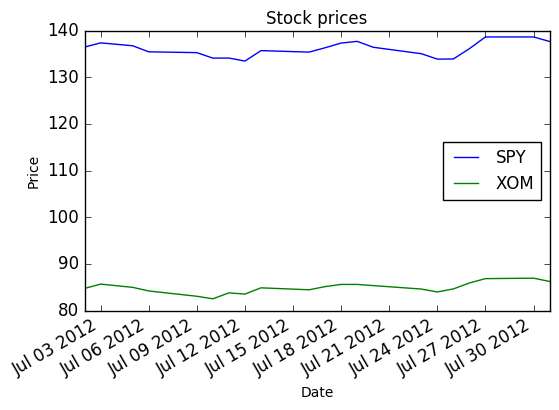

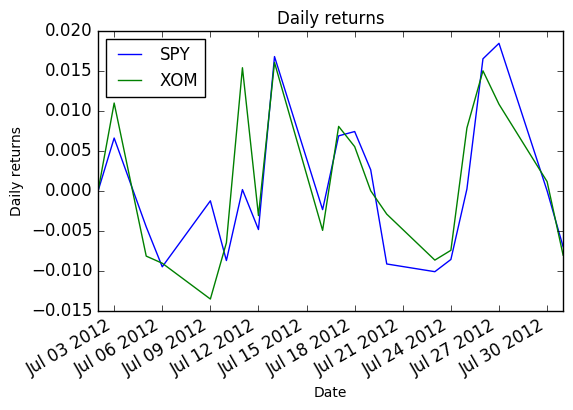

In [143]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns=df.copy()
    daily_returns[1:]=(df[1:]/df[:-1].values)-1
    daily_returns.ix[0,:]=0
    return daily_returns
    


def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()


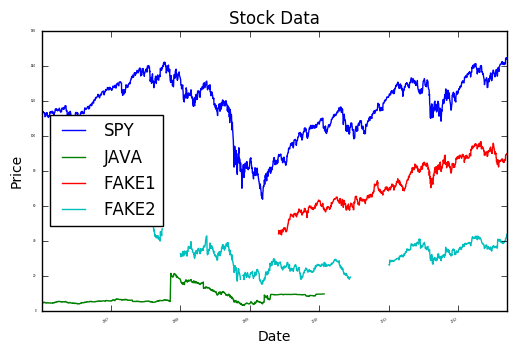

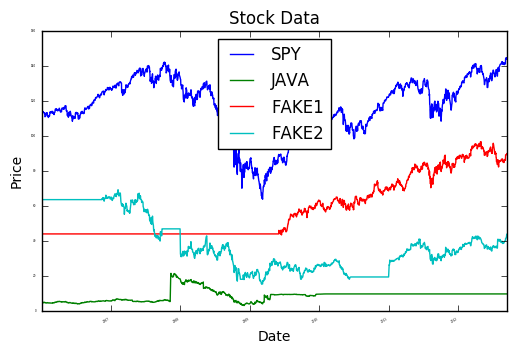

In [10]:
"""Fill missing values"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    
    ##########################################################
    # TODO: Your code here (DO NOT modify anything else)
    ##########################################################
    df_data.fillna(method="ffill", inplace=True)
    df_data.fillna(method="bfill", inplace=True)


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_final = pd.DataFrame(index=dates)
    if "SPY" not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, "SPY")

    for symbol in symbols:
        file_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(file_path, parse_dates=True, index_col="Date",
            usecols=["Date", "Adj Close"], na_values=["nan"])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df_final = df_final.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade
            df_final = df_final.dropna(subset=["SPY"])

    return df_final


def plot_data(df_data):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title="Stock Data", fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    """Function called by Test Run."""
    # Read data
    symbol_list = ["JAVA", "FAKE1", "FAKE2"]  # list of symbols
    start_date = "2005-12-31"
    end_date = "2014-12-07"
    dates = pd.date_range(start_date, end_date)  # date range as index
    df_data = get_data(symbol_list, dates)  # get data for each symbol

    

    # Plot
    plot_data(df_data)
    # Fill missing values
    fill_missing_values(df_data)
    plot_data(df_data)


test_run()


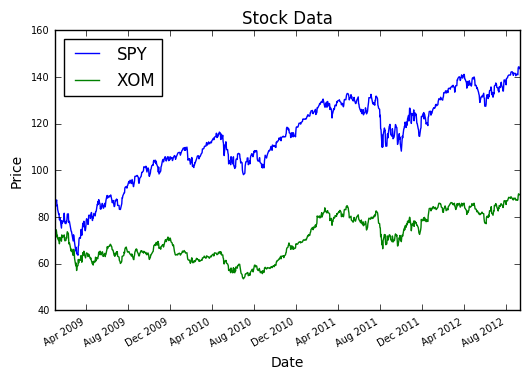

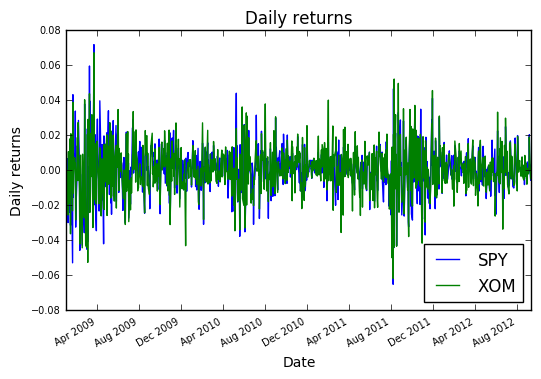

('mean_spy=', 0.0006355783322251791, 'std_spy=', 0.013370490899409858)
('mean_xom=', 0.000293848589308605, 'std_xom=', 0.013867745935023938)
kurtosis_spy= 3.22027825949
kurtosis_xom= 2.14532583078


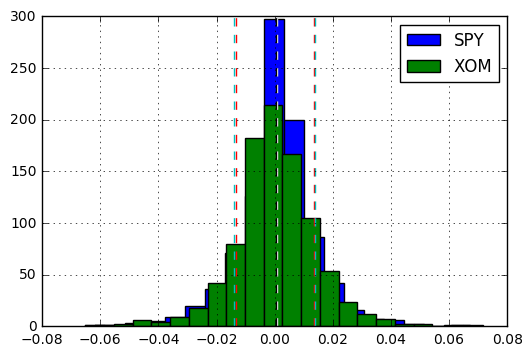

In [52]:
#histogram, showing mean, sigma, getting kurtosis

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns=df.copy()
    daily_returns[1:]=(df[1:]/df[:-1].values)-1
    daily_returns.ix[0,:]=0
    return daily_returns

def plot_data(df_data,title="Stock Data",xlabel="Date",ylabel="Price"):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title=title, fontsize=7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def test_run():
    # Read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns and plot two seperate histogram charts
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    #histogram
    ax1=daily_returns['SPY'].hist(bins=20, label='SPY')
    ax2=daily_returns['XOM'].hist(bins=20, label='XOM')
    plt.legend(loc='upper right')
    #ax1.legend('SPY',loc='upper right')
    #ax2.legend('XOM',loc='upper right')
    
    
    #get mean,std
    mean_spy=daily_returns['SPY'].mean()
    std_spy=daily_returns['SPY'].std()
    mean_xom=daily_returns['XOM'].mean()
    std_xom=daily_returns['XOM'].std()
    print('mean_spy=',mean_spy,'std_spy=',std_spy)
    print('mean_xom=',mean_xom,'std_xom=',std_xom)
    
    ax1.axvline(mean_spy,color='w',linestyle='dashed',linewidth=1)
    ax1.axvline(std_spy,color='r',linestyle='dashed',linewidth=1)
    ax1.axvline(-std_spy,color='r',linestyle='dashed',linewidth=1)
    
    ax2.axvline(mean_xom,color='k',linestyle='dashed',linewidth=1)
    ax2.axvline(std_xom,color='c',linestyle='dashed',linewidth=1)
    ax2.axvline(-std_xom,color='c',linestyle='dashed',linewidth=1)
    
    #Compute kurtosis
    print 'kurtosis_spy=', daily_returns['SPY'].kurtosis()
    print 'kurtosis_xom=', daily_returns['XOM'].kurtosis()
    
test_run()


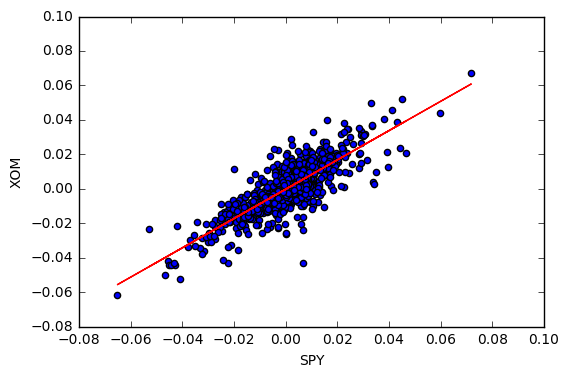

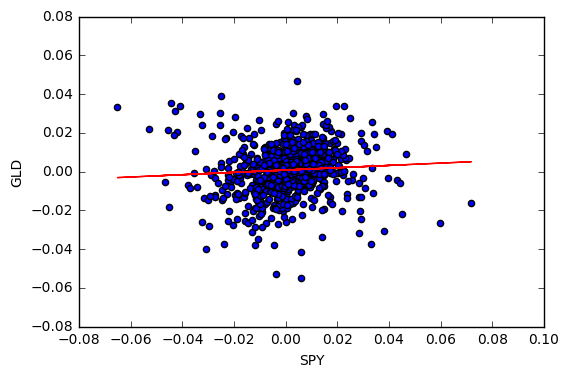

('beta_XOM, alpha_XOM', 0.850746223672596, -0.00024686727668009188)
('beta_GLD, alpha_GLD', 0.05976113483222497, 0.00074788111616017321)


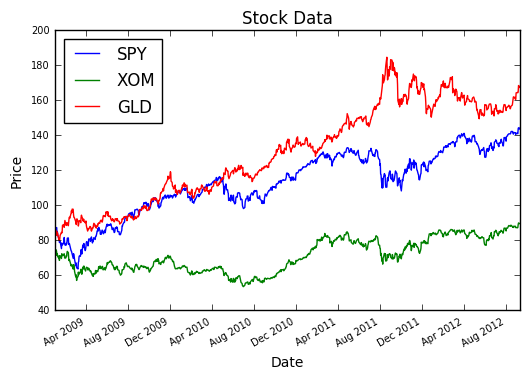

corr=
          SPY       XOM       GLD
SPY  1.000000  0.820241  0.067324
XOM  0.820241  1.000000  0.069687
GLD  0.067324  0.069687  1.000000


In [66]:
#scatter plot
#beta(how reactive stock is to the market), 
#alpha(overall doing better or worse than the marget), 
#pearson correlation (how tightly fit the line)

def test_run():
    # Read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY','XOM', 'GLD']
    df = get_data(symbols, dates)

    # Compute daily returns and plot two seperate histogram charts
    daily_returns = compute_daily_returns(df)
    daily_returns.plot(kind='scatter',x='SPY', y='XOM')
    beta_XOM, alpha_XOM=np.polyfit(daily_returns['SPY'], daily_returns['XOM'],1)
    plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY']+alpha_XOM, '-', color='r')
    plt.show()
    daily_returns.plot(kind='scatter',x='SPY', y='GLD')
    beta_GLD, alpha_GLD=np.polyfit(daily_returns['SPY'], daily_returns['GLD'],1)
    plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY']+alpha_GLD, '-', color='r')
    plt.show()
    print('beta_XOM, alpha_XOM',beta_XOM, alpha_XOM)
    print('beta_GLD, alpha_GLD',beta_GLD, alpha_GLD)
    plot_data(df)
    
    print 'corr=\n', daily_returns.corr(method='pearson')
    
test_run()

In [ ]:
# Portfolio allocation can be solved by minimizer.


In [10]:
# optimizer practice
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

from scipy.optimize import minimize, rosen, rosen_der

x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
print(res)
print(res.x)

 final_simplex: (array([[ 1.00000002,  1.00000002,  1.00000007,  1.00000015,  1.00000028],
       [ 0.99999999,  0.99999996,  0.99999994,  0.99999986,  0.99999971],
       [ 1.00000005,  1.00000007,  1.00000017,  1.00000031,  1.00000063],
       [ 1.00000004,  1.00000008,  1.00000013,  1.00000025,  1.00000047],
       [ 0.99999999,  0.99999996,  0.99999994,  0.99999984,  0.99999963],
       [ 1.00000005,  1.00000004,  1.00000003,  1.00000003,  1.00000004]]), array([  1.94206402e-13,   2.44964782e-13,   3.10422870e-13,
         3.37952410e-13,   5.52173609e-13,   7.16586838e-13]))
           fun: 1.9420640199868412e-13
       message: 'Optimization terminated successfully.'
          nfev: 494
           nit: 295
        status: 0
       success: True
             x: array([ 1.00000002,  1.00000002,  1.00000007,  1.00000015,  1.00000028])
[ 1.00000002  1.00000002  1.00000007  1.00000015  1.00000028]


In [5]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'gtol': 1e-6, 'disp': True})
print(res.x)
print(res.message)
print(res.hess_inv)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 31
         Gradient evaluations: 31
[ 1.  1.  1.  1.  1.]
Optimization terminated successfully.
[[ 0.00763624  0.0125159   0.02359808  0.0465684   0.09317974]
 [ 0.0125159   0.02489687  0.04727754  0.09353774  0.18708048]
 [ 0.02359808  0.04727754  0.09483095  0.18783847  0.37561493]
 [ 0.0465684   0.09353774  0.18783847  0.37715312  0.75414172]
 [ 0.09317974  0.18708048  0.37561493  0.75414172  1.51296479]]


In [34]:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
print("type(fun)=", type(fun))
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds, constraints=cons)
print(res)

('type(fun)=', <type 'function'>)
     fun: 0.80000000119209846
     jac: array([ 0.80000002, -1.59999999,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 1.4,  1.7])


In [35]:
#This is from ML4T lecture 

import scipy.optimize as spo

def f(X):
    Y=(X-1.5)**2+0.5
    return Y

Xguess=2.0
print("type(f)=",type(f))
min_result=spo.minimize(f,Xguess,method="SLSQP",options={'disp':True})

print min_result
'''
Xplot=np.linspace(0.5,2.5,100)
Yplot=f(Xplot)
plt.plot(Xplot,Yplot)
plt.plot(min_result.x,min_result.fun,'ro')
plt.show()
'''

('type(f)=', <type 'function'>)
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
     fun: array([ 0.5])
     jac: array([  1.49011612e-08,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 1.5])


"\nXplot=np.linspace(0.5,2.5,100)\nYplot=f(Xplot)\nplt.plot(Xplot,Yplot)\nplt.plot(min_result.x,min_result.fun,'ro')\nplt.show()\n"

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 136.325534783
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
result=      fun: 136.32553478265476
     jac: array([ 0.00082588,  0.0002594 ,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 4.03908566,  1.8582663 ])


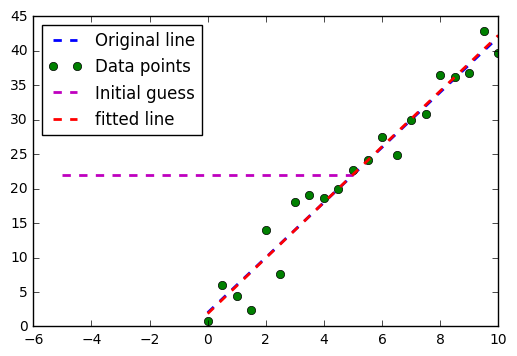

In [37]:
#this is also from lecture
#line=C0 is slope,line[0], C1 is Y intercept,line[1]

def error_func(line,data):
    err=np.sum((data[:,1]-(line[0]*data[:,0]+line[1]))**2)
    return err

#Define original line
l_orig=np.float32([4,2])
Xorig=np.linspace(0,10,21)
Yorig=l_orig[0]*Xorig+l_orig[1]
plt.plot(Xorig,Yorig, 'b--',linewidth=2.0,label="Original line")

#Generate noisy datapoints
noise_sigma=3.0
noise=np.random.normal(0,noise_sigma,Yorig.shape)
data=np.asarray([Xorig,Yorig+noise]).T
plt.plot(data[:,0],data[:,1],'go',label="Data points")

def fit_line(data,error_func):
    #Generate initial guess for line model
    l=np.float32([0,np.mean(data[:,1])])
    x_ends=np.float32([-5,5])
    plt.plot(x_ends,l[0]*x_ends+l[1],'m--',linewidth=2, label="Initial guess")

    #call optimizer to minimize error fuction
    print "type(error_func)===",type(error_func)
    result=spo.minimize(error_func,l,args=(data,), method='SLSQP',options={'disp':True})
    print "result=",result
    return result.x

#Try to fit to a line to this data
l_fit=fit_line(data,error_func)
plt.plot(data[:,0], l_fit[0]*data[:,0]+l_fit[1], 'r--', linewidth=2.0, label="fitted line")

#Add legend
plt.legend(loc='upper left')

# Computational Investing

# numpy practice

In [121]:
def test_run():
    print np.ones((5,4),dtype=np.int_)
    print np.random.random((5,4))
    print np.random.rand(5,4)
    print np.random.normal(50,10,size=(2,3))
    print np.random.randint(0,10, size=(5,4))

test_run()

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[ 0.50485363  0.55065349  0.98371431  0.85653741]
 [ 0.96764814  0.47474563  0.84759487  0.99100508]
 [ 0.18762829  0.14718011  0.03903814  0.9561919 ]
 [ 0.29194782  0.30158913  0.91388696  0.58981561]
 [ 0.43400936  0.69146929  0.10271509  0.55757647]]
[[ 0.84247379  0.0027076   0.51519564  0.21084043]
 [ 0.59529643  0.25293607  0.81460988  0.01476448]
 [ 0.23534116  0.60912855  0.41672139  0.83039598]
 [ 0.91193369  0.60576801  0.79570273  0.09548169]
 [ 0.95239004  0.59359792  0.71047357  0.74750544]]
[[ 45.99698239  38.79057261  40.26914749]
 [ 45.49429044  60.54493114  63.72530585]]
[[2 7 2 5]
 [6 0 3 2]
 [5 6 8 9]
 [3 1 8 6]
 [6 4 6 5]]


In [127]:
def test_run():
    
    np.random.seed(693) #seed the random number generator
    a=np.random.randint(0,10,size=(5,4))
    print a
    #print a.shape, a.size, a.dtype, a.sum, a.sum(axis=0), a.min(axis=0)

test_run()

[[2 0 5 1]
 [1 3 4 4]
 [9 2 9 1]
 [9 3 7 5]
 [4 7 0 3]]


In [134]:
def get_max_index(a):
    """Return the index of the maximum value in given 1D array."""
    # TODO: Your code here
    return a.argmax()

def test_run():
    a = np.array([9, 6, 2, 3, 12, 14, 7, 10], dtype=np.int32)  # 32-bit integer array
    print "Array:", a
    
    # Find the maximum and its index in array
    t1=time.time()
    print "Maximum value:", a.max()
    print "Index of max.:", get_max_index(a)
    t2=time.time()
    print "Time it take=", t2-t1,"seconds"
    
    mean=a.mean()
    
    #masking
    a[a<mean]=mean
    print mean,int(mean),a

test_run()

Array: [ 9  6  2  3 12 14  7 10]
Maximum value: 14
Index of max.: 5
Time it take= 0.000300884246826 seconds
7.875 7 [ 9  7  7  7 12 14  7 10]
